In [178]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

url = 'C:/Users/ADMINX/Downloads/Compressed/ecuacovid-master/ecuacovid-master/datos_crudos/vacunas/vacunas.csv'

df = pd.read_csv(url)
df

,fecha,dosis_total,primera_dosis,segunda_dosis
0,21/01/2021,0,0,0
1,22/01/2021,108,108,0
2,27/01/2021,2982,2982,0
3,04/02/2021,6228,6228,0
4,17/02/2021,8190,6228,1962
5,24/02/2021,24492,20784,3708
6,01/03/2021,42114,35886,6228
7,04/03/2021,59316,53088,6228
8,05/03/2021,71148,64920,6228
9,08/03/2021,74472,68244,6228


<h1>Generar graficas y reportes del total de personas  vacunadas.</h1>

356783.0
2.2101686181263315e+275


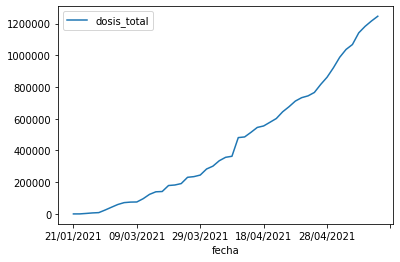

In [25]:
df_t = pd.read_csv(url,header = None)
FMT = '%Y-%m-%d'
df_t.columns =['fecha','dosis_total','primera_dosis', 'segunda_dosis']
date = df_t['fecha'][1:]
filtro = df_t['dosis_total'][1:] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print(mediana)
print(media)
df.plot(x ='fecha', y='dosis_total')


<h1>Generar grafico de pie por fabricante de la vacuna.</h1>

In [28]:
url = 'C:/Users/ADMINX/Downloads/Compressed/ecuacovid-master/ecuacovid-master/datos_crudos/vacunas/fabricantes.csv'
df = pd.read_csv(url)
df

,vaccine,total,arrived_at
0,Pfizer/BioNTech,8190,20/01/2021
1,Pfizer/BioNTech,16380,17/02/2021
2,Pfizer/BioNTech,17550,24/02/2021
3,Pfizer/BioNTech,31590,03/03/2021
4,Sinovac,20000,06/03/2021
5,Pfizer/BioNTech,73710,10/03/2021
6,Oxford/AstraZeneca,84000,17/03/2021
7,Pfizer/BioNTech,62010,17/03/2021
8,Pfizer/BioNTech,65520,24/03/2021
9,Pfizer/BioNTech,66690,31/03/2021


['Oxford/AstraZeneca' 'Sinovac' 'Pfizer/BioNTech']
[ 420000 1020000  659880]


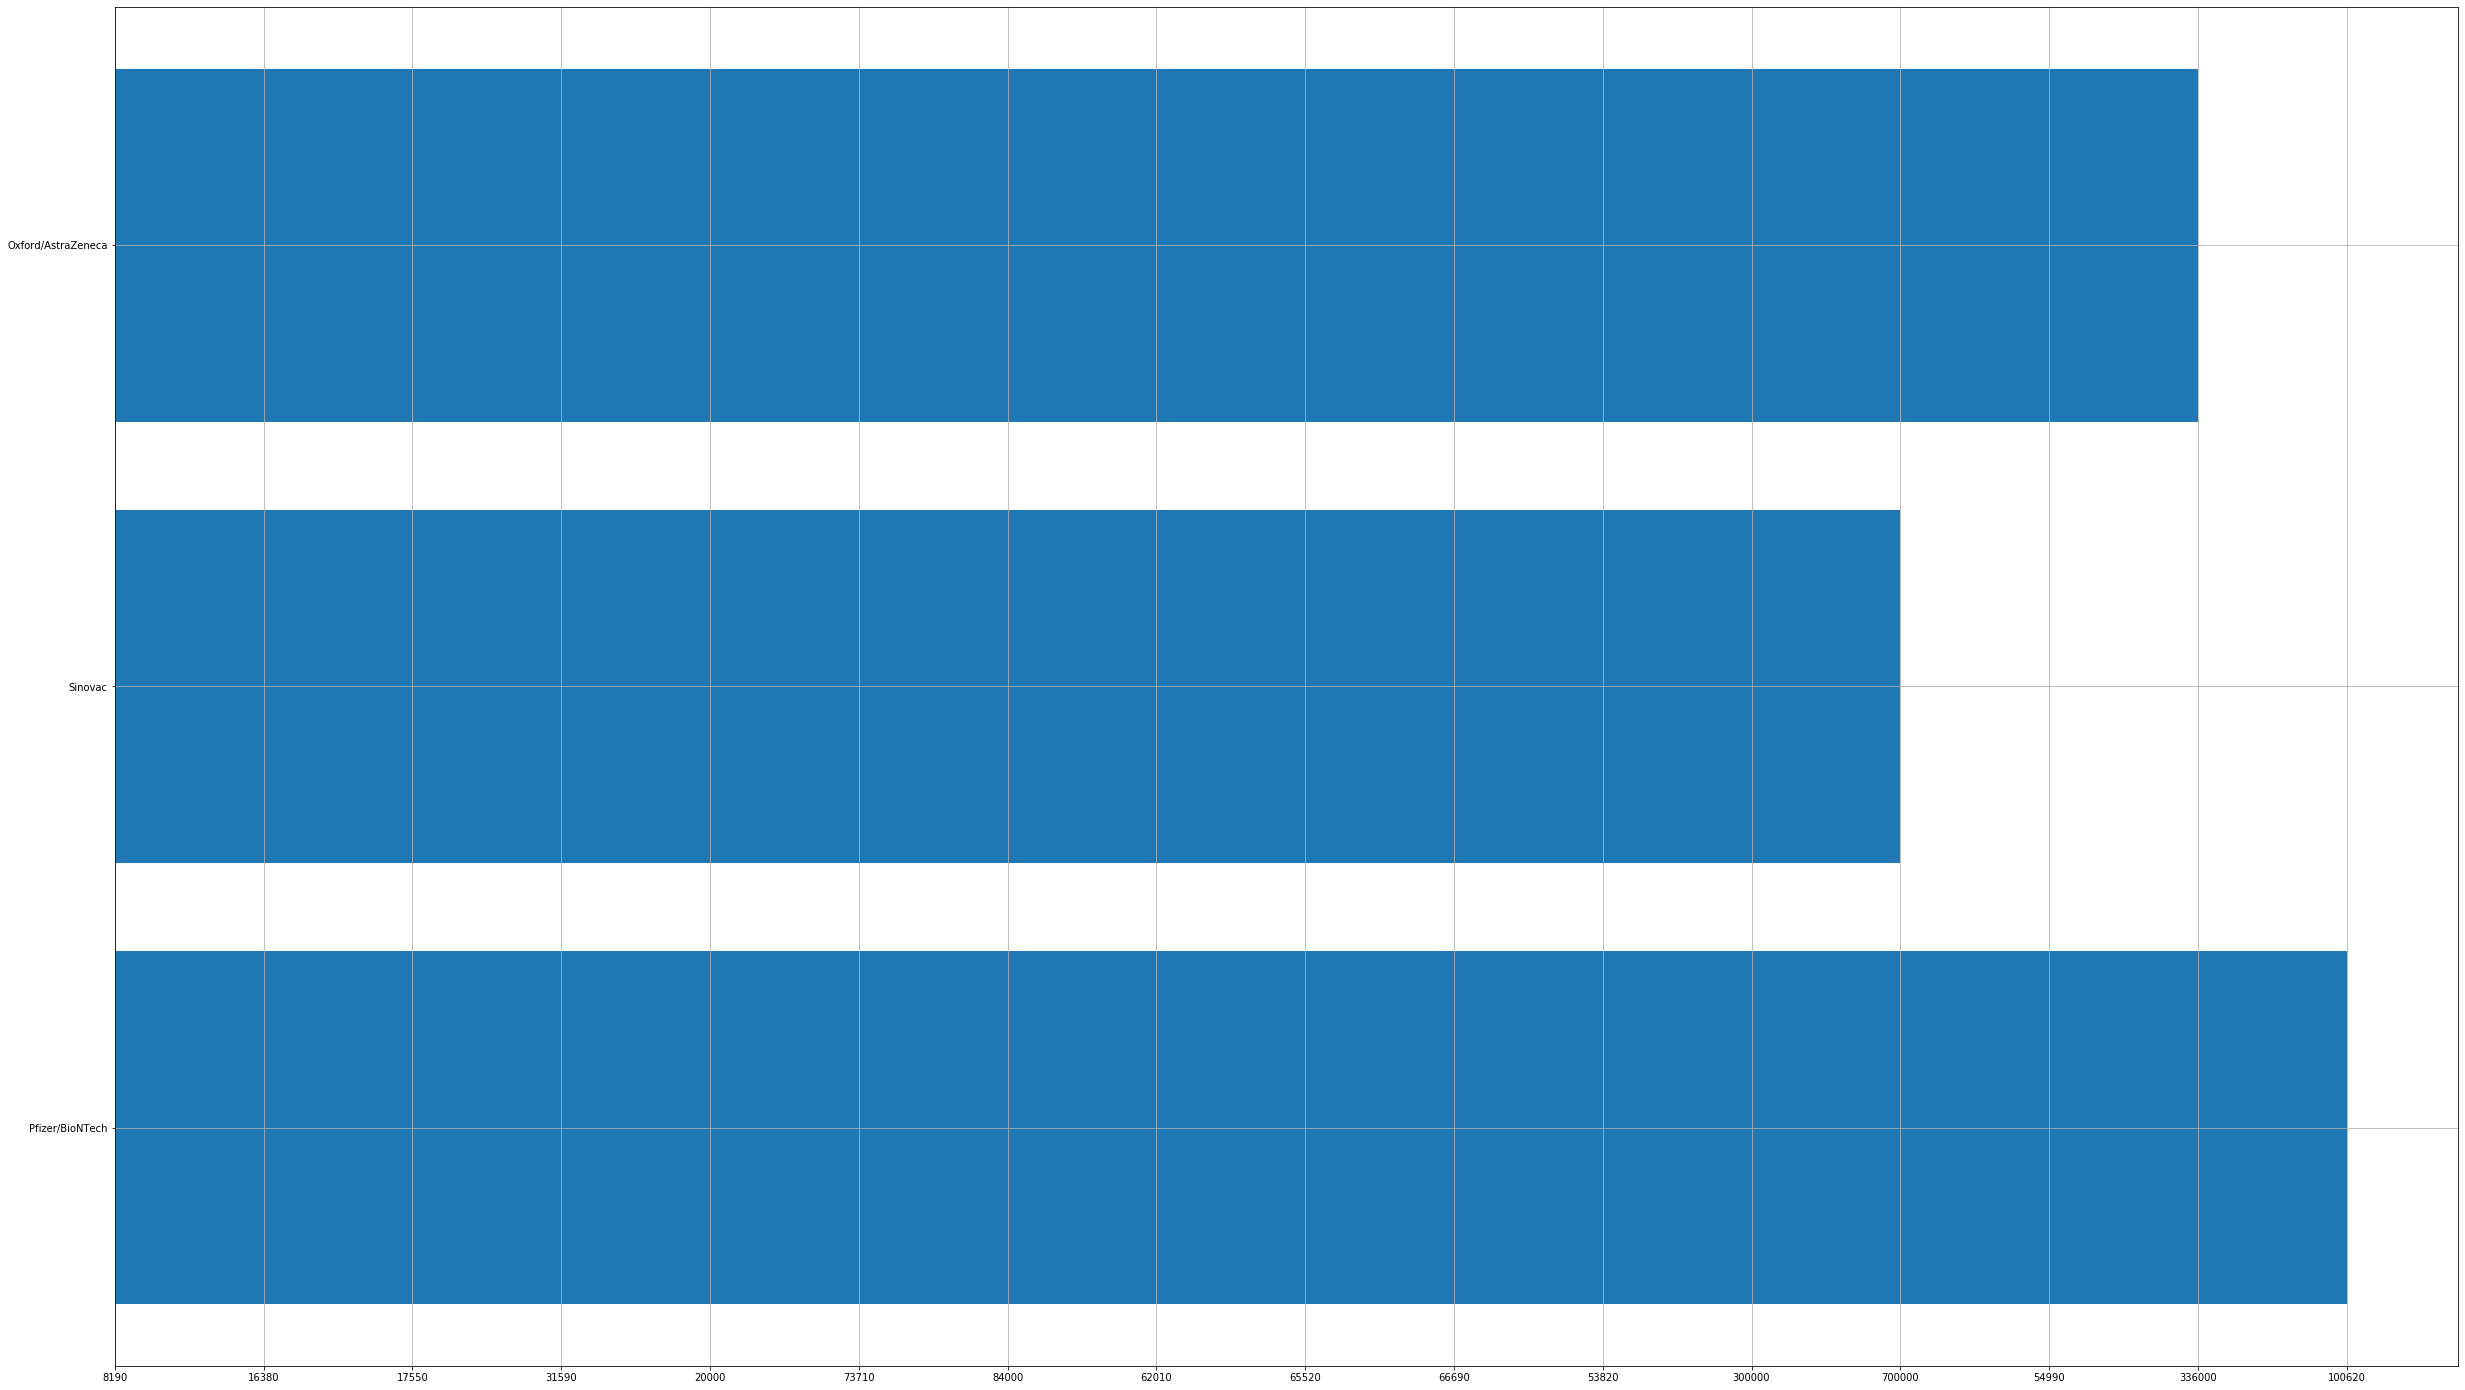

In [33]:
df_fa = pd.read_csv(url, header = None)
df_fa.columns = ['vaccine', 'total', 'arrived_at']
a = np.array(list(set(df_fa['vaccine'][1:])))
print(a)

ox = 0
si = 0
pf = 0
for i, j in zip(df_fa['vaccine'][1:], df_fa['total'][1:]):
  if i == a[0]:
    si = si + + int(j)
  elif i == a[1]:
    pf = pf + + int(j)
  elif i == a[2]:
    ox = ox + int(j)

b = np.array([si, pf, ox])
print(b)
plt.barh(df_fa['vaccine'][1:], df_fa['total'][1:])
plt.gcf().set_size_inches(42, 25)
plt.grid()
plt.show()

<h1>Generar histogramas de vacunas por mes de llega y fabricante.</h1>


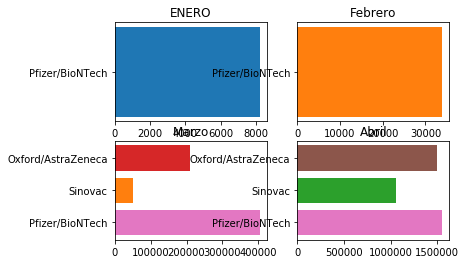

In [177]:
from ipykernel import kernelapp as app
lista1=[]
fig1 = plt.subplot(2, 2, 1)
fig2 = plt.subplot(2, 2, 2)
fig3 = plt.subplot(2, 2, 3)
fig4 = plt.subplot(2, 2, 4) 
for i in range(1, 32):
  lista1.append(0) 
con = 0
con1 = 0
con2=0
con3=0
con4=0

for i, j, k in zip(df_fa['vaccine'][1:], df_fa['total'][1:], df_fa['arrived_at'][1:]):
  fecha_dt = datetime.strptime(k, '%d/%m/%Y')     
  if((i == a[0] or i == a[1] or i == a[2]) and (fecha_dt.month == 1)):
      con =con+int(j)
      fig1.barh(i,con)
      fig1.set_title('ENERO')  
  elif((i == a[0] or i == a[1] or i == a[2]) and (fecha_dt.month == 2)):
      con1 =con1+int(j)
      fig2.barh(i,con1)
      fig2.set_title('Febrero')
  elif((i == a[0] or i == a[1] or i == a[2]) and (fecha_dt.month == 3)):
      con2 =con2+int(j)
      fig3.barh(i,con2) 
      fig3.set_title('Marzo')
  elif((i == a[0] or i == a[1] or i == a[2]) and (fecha_dt.month == 4)):
      con3 =con3+int(j)
      fig4.barh(i,con3) 
      fig4.set_title('Abril')
#   elif((i == a[0] or i == a[1] or i == a[2]) and (fecha_dt.month == 5)):
#       con4 =con4+int(j)
#       plt.barh(i,con4)
#       plt.title('Mayo')

<h2>Generar un reporte parametrizado que pueda ingresar los datos de las fechas inicio y fin para obtener la información de las graficas vistas en el primer punto.</h2>

ingrese fecha de inicio01/01/2021
ingrese fecha de fin01/03/2021


<BarContainer object of 6 artists>

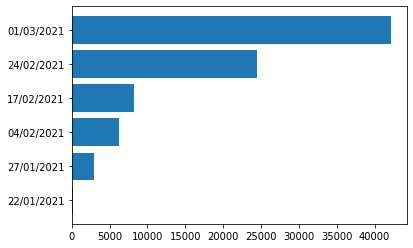

In [197]:
df_planva = pd.read_csv(url) 
lisx=[]
lisy=[]
df_planva.columns =['fecha','dosis_total','primera_dosis', 'segunda_dosis']
#SE INGRESA LAS FECHAS INICIO Y FIN
feini=input("ingrese fecha de inicio")
fefin=input("ingrese fecha de fin")
for d,i, j, k in zip(df_planva['fecha'][1:],df_planva['dosis_total'][1:], df_planva['primera_dosis'][1:], df_planva['segunda_dosis'][1:]):
  fecha_dt = datetime.strptime(d, '%d/%m/%Y') 
  if(datetime.strptime(feini,'%d/%m/%Y')<=datetime.strptime(d, '%d/%m/%Y') and datetime.strptime(fefin,'%d/%m/%Y')>=datetime.strptime(d,'%d/%m/%Y')):
    lisx.append(d)
    lisy.append(i)
plt.barh(lisx,lisy)

<h2> Generar un modelo matemático de predicción para regresión lineal, exponencial, polinómico y logarítmico, del procesos de vacunación en base al numero actual de vacunados (1 y 2 dosis) y a la llegada de nuevas vacunas</h2>

In [186]:
url = 'C:/Users/ADMINX/Downloads/Compressed/ecuacovid-master/ecuacovid-master/datos_crudos/vacunas/vacunas.csv'

#Vamos a comprobar:
# según la media y la mediana podemos obtener la taza de crecieminto y predicir su comportamiento.
# Cargamos los datos de total de casos 
df_t = pd.read_csv(url)
FMT = '%Y-%m-%d'
date = df_t['date']
df_t['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df_t = df_t.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
y = list(df_t.iloc [:, 1]) # Total casos
x = list(df_t.iloc [:, 0]) # Dias
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)
print(prediccion_siguiente)

<h2>Desarrollar y generar un proceso de comparación con al menos cuatro países (2. Latinoamérica, 1. E.E.U.U./Canada,  1. Europa</h2>

-----------------ECUADOR--------------
Coefficients: 
 [2057.478812]
Independent term: 
 -59189.493800539065
----------------PERU---------------
Coefficients: 
 [9357.03840125]
Independent term: 
 -117858.25287356327


Text(0.5, 1.0, 'PERU')

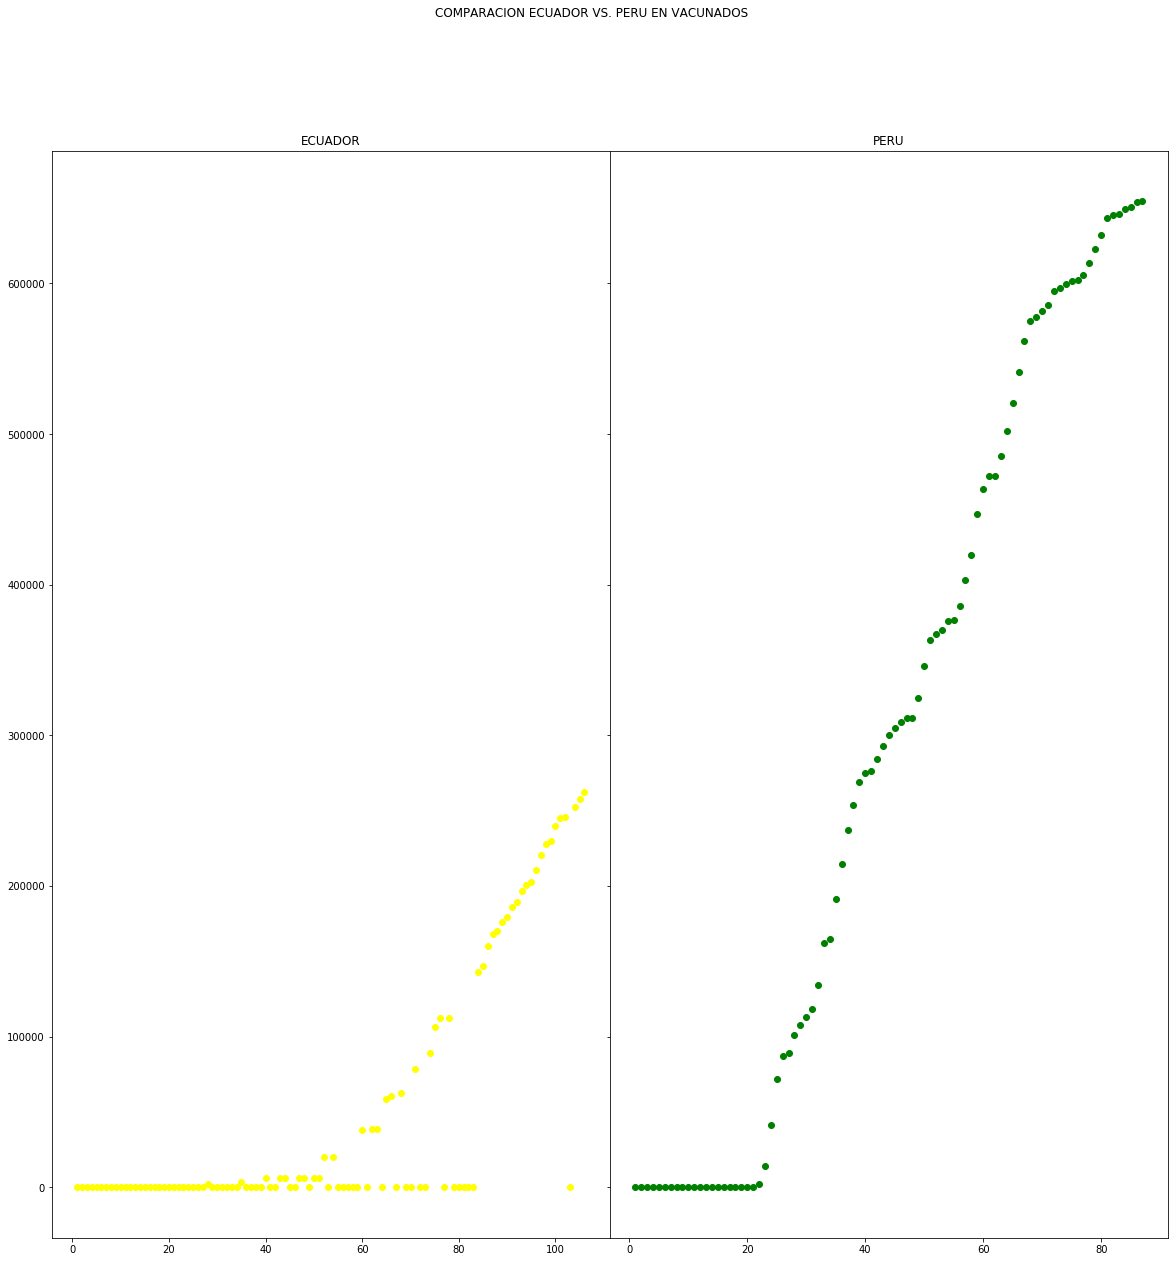

In [204]:
url_v = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
df_vacum = pd.read_csv(url_v, header = None).fillna(0)
df_vacum.columns = ['location', 'iso_code', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million']
lista_fechas = []
lista_tot = []
lista_fechasbr = []
lista_totbr = []
for i, j, k in zip(df_vacum['location'], df_vacum['date'], df_vacum['people_fully_vaccinated']):
#   print(i)
  if i == 'Ecuador':
    lista_fechas.append(j)
    lista_tot.append(k)
  elif i == 'Peru':
    lista_fechasbr.append(j)
    lista_totbr.append(k)
dat = np.array(lista_fechas) 
tot = np.array(lista_tot, dtype='float')
x = np.arange(1, len(tot) + 1, 1) 
dat_br = np.array(lista_fechasbr) 
tot_br = np.array(lista_totbr, dtype='float')
xbr = np.arange(1, len(tot_br) + 1, 1) 
from sklearn import linear_model 
print("-----------------ECUADOR--------------") 
regr = linear_model.LinearRegression()  
regr.fit(np.array(x).reshape(-1, 1), tot)
print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
print("----------------PERU---------------") 
regrbr = linear_model.LinearRegression()
regrbr.fit(np.array(xbr).reshape(-1, 1), tot_br)
print('Coefficients: \n', regrbr.coef_)
print('Independent term: \n', regrbr.intercept_)
#SE GRAFICA
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(20,20))
fig.suptitle('COMPARACION ECUADOR VS. PERU EN VACUNADOS')
ax1.scatter(x, tot, color='yellow')
ax1.set_title('ECUADOR')
x_real = np.array(range(50, 100))
ax2.scatter(xbr, tot_br, color='green')
ax2.set_title('PERU')
 

-----------------ECUADOR--------------
Coefficients: 
 [2057.478812]
Independent term: 
 -59189.493800539065
----------------COLOMBIA---------------
Coefficients: 
 [18072.47528129]
Independent term: 
 -305725.71139240486


Text(0.5, 1.0, 'COLOMBIA')

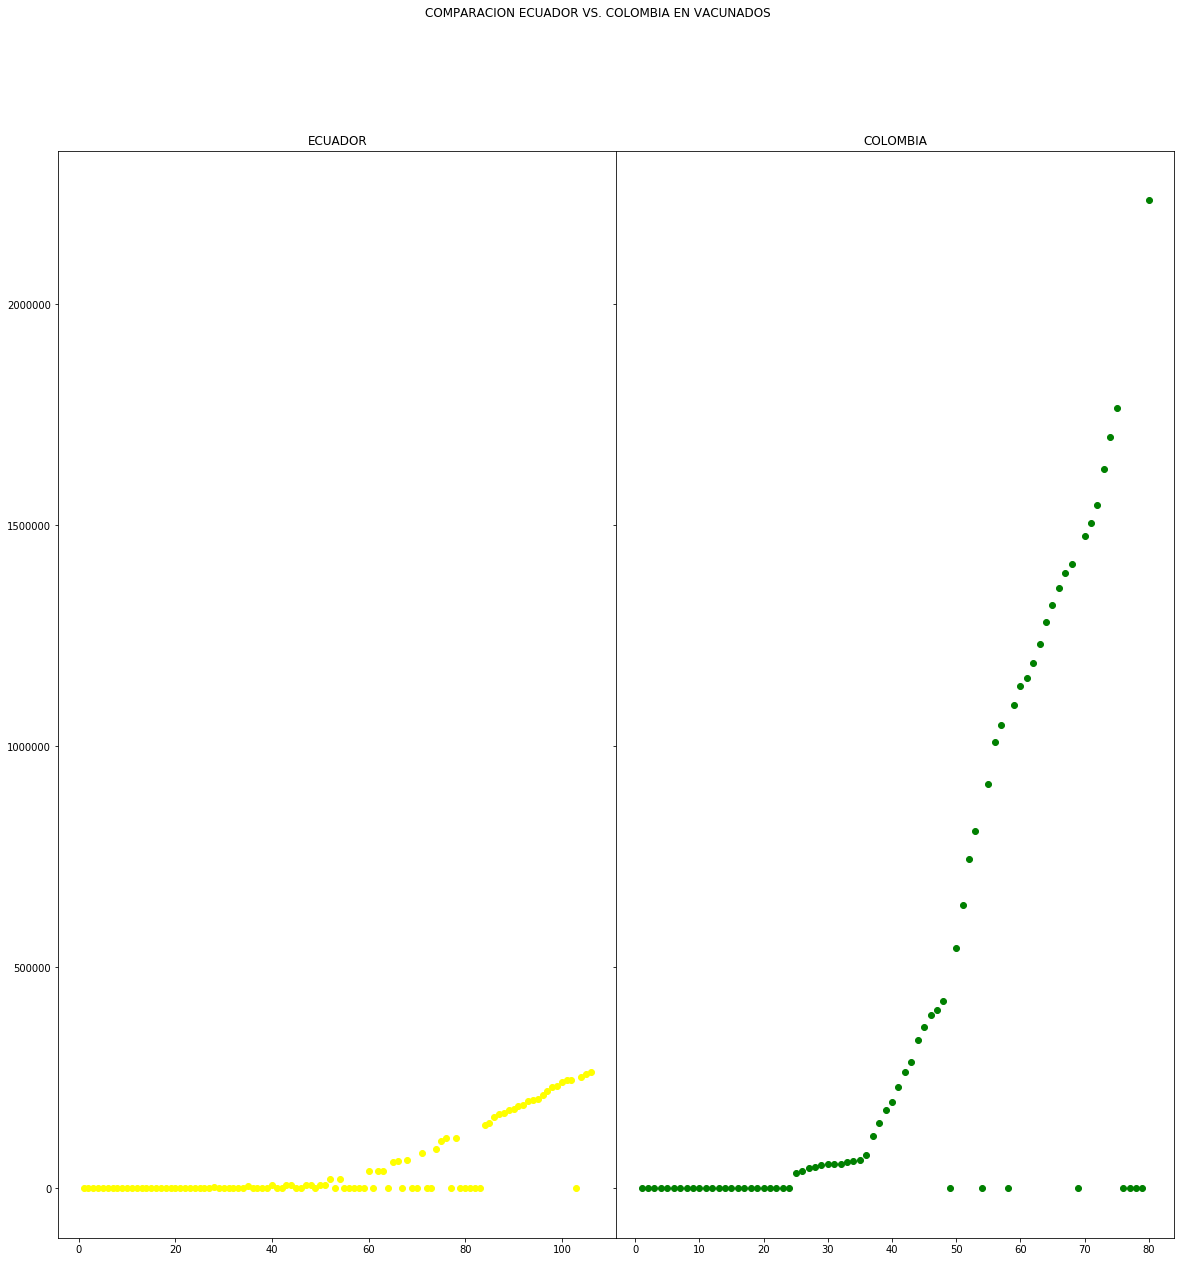

In [205]:
url_v = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
df_vacum = pd.read_csv(url_v, header = None).fillna(0)
df_vacum.columns = ['location', 'iso_code', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million']
lista_fechas = []
lista_tot = []
lista_fechasbr = []
lista_totbr = []
for i, j, k in zip(df_vacum['location'], df_vacum['date'], df_vacum['people_fully_vaccinated']):
#   print(i)
  if i == 'Ecuador':
    lista_fechas.append(j)
    lista_tot.append(k)
  elif i == 'Colombia':
    lista_fechasbr.append(j)
    lista_totbr.append(k)
dat = np.array(lista_fechas) 
tot = np.array(lista_tot, dtype='float')
x = np.arange(1, len(tot) + 1, 1) 
dat_br = np.array(lista_fechasbr) 
tot_br = np.array(lista_totbr, dtype='float')
xbr = np.arange(1, len(tot_br) + 1, 1) 
from sklearn import linear_model 
print("-----------------ECUADOR--------------") 
regr = linear_model.LinearRegression()  
regr.fit(np.array(x).reshape(-1, 1), tot)
print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
print("----------------COLOMBIA---------------") 
regrbr = linear_model.LinearRegression()
regrbr.fit(np.array(xbr).reshape(-1, 1), tot_br)
print('Coefficients: \n', regrbr.coef_)
print('Independent term: \n', regrbr.intercept_)
#SE GRAFICA
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(20,20))
fig.suptitle('COMPARACION ECUADOR VS. COLOMBIA EN VACUNADOS')
ax1.scatter(x, tot, color='yellow')
ax1.set_title('ECUADOR')
x_real = np.array(range(50, 100))
ax2.scatter(xbr, tot_br, color='green')
ax2.set_title('COLOMBIA')

-----------------ECUADOR--------------
Coefficients: 
 [2057.478812]
Independent term: 
 -59189.493800539065
----------------ESPAÑA---------------
Coefficients: 
 [31477.07133276]
Independent term: 
 -625140.5852325731


Text(0.5, 1.0, 'ESPAÑA')

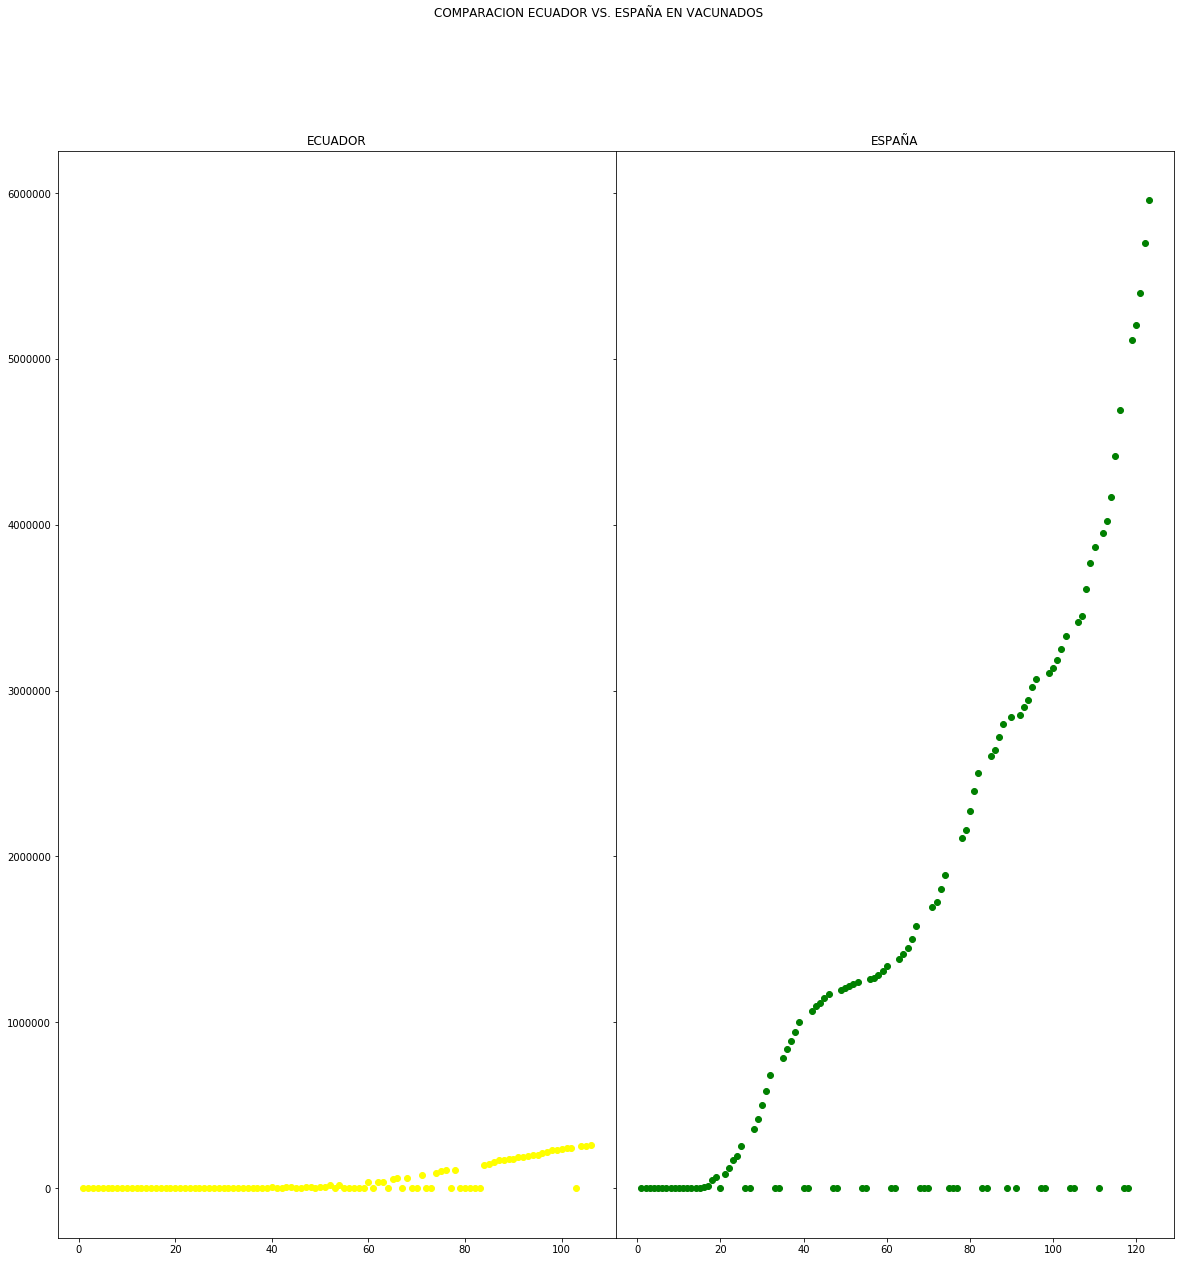

In [208]:
url_v = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
df_vacum = pd.read_csv(url_v, header = None).fillna(0)
df_vacum.columns = ['location', 'iso_code', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million']
lista_fechas = []
lista_tot = []
lista_fechasbr = []
lista_totbr = []
for i, j, k in zip(df_vacum['location'], df_vacum['date'], df_vacum['people_fully_vaccinated']):
#   print(i)
  if i == 'Ecuador':
    lista_fechas.append(j)
    lista_tot.append(k)
  elif i == 'Spain':
    lista_fechasbr.append(j)
    lista_totbr.append(k)
dat = np.array(lista_fechas) 
tot = np.array(lista_tot, dtype='float')
x = np.arange(1, len(tot) + 1, 1) 
dat_br = np.array(lista_fechasbr) 
tot_br = np.array(lista_totbr, dtype='float')
xbr = np.arange(1, len(tot_br) + 1, 1) 
from sklearn import linear_model 
print("-----------------ECUADOR--------------") 
regr = linear_model.LinearRegression()  
regr.fit(np.array(x).reshape(-1, 1), tot)
print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
print("----------------ESPAÑA---------------") 
regrbr = linear_model.LinearRegression()
regrbr.fit(np.array(xbr).reshape(-1, 1), tot_br)
print('Coefficients: \n', regrbr.coef_)
print('Independent term: \n', regrbr.intercept_)
#SE GRAFICA
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(20,20))
fig.suptitle('COMPARACION ECUADOR VS. ESPAÑA EN VACUNADOS')
ax1.scatter(x, tot, color='yellow')
ax1.set_title('ECUADOR')
x_real = np.array(range(50, 100))
ax2.scatter(xbr, tot_br, color='green')
ax2.set_title('ESPAÑA')

-----------------ECUADOR--------------
Coefficients: 
 [2057.478812]
Independent term: 
 -59189.493800539065
----------------INDIA---------------
Coefficients: 
 [236482.88382981]
Independent term: 
 -5920036.346530039


Text(0.5, 1.0, 'INDIA')

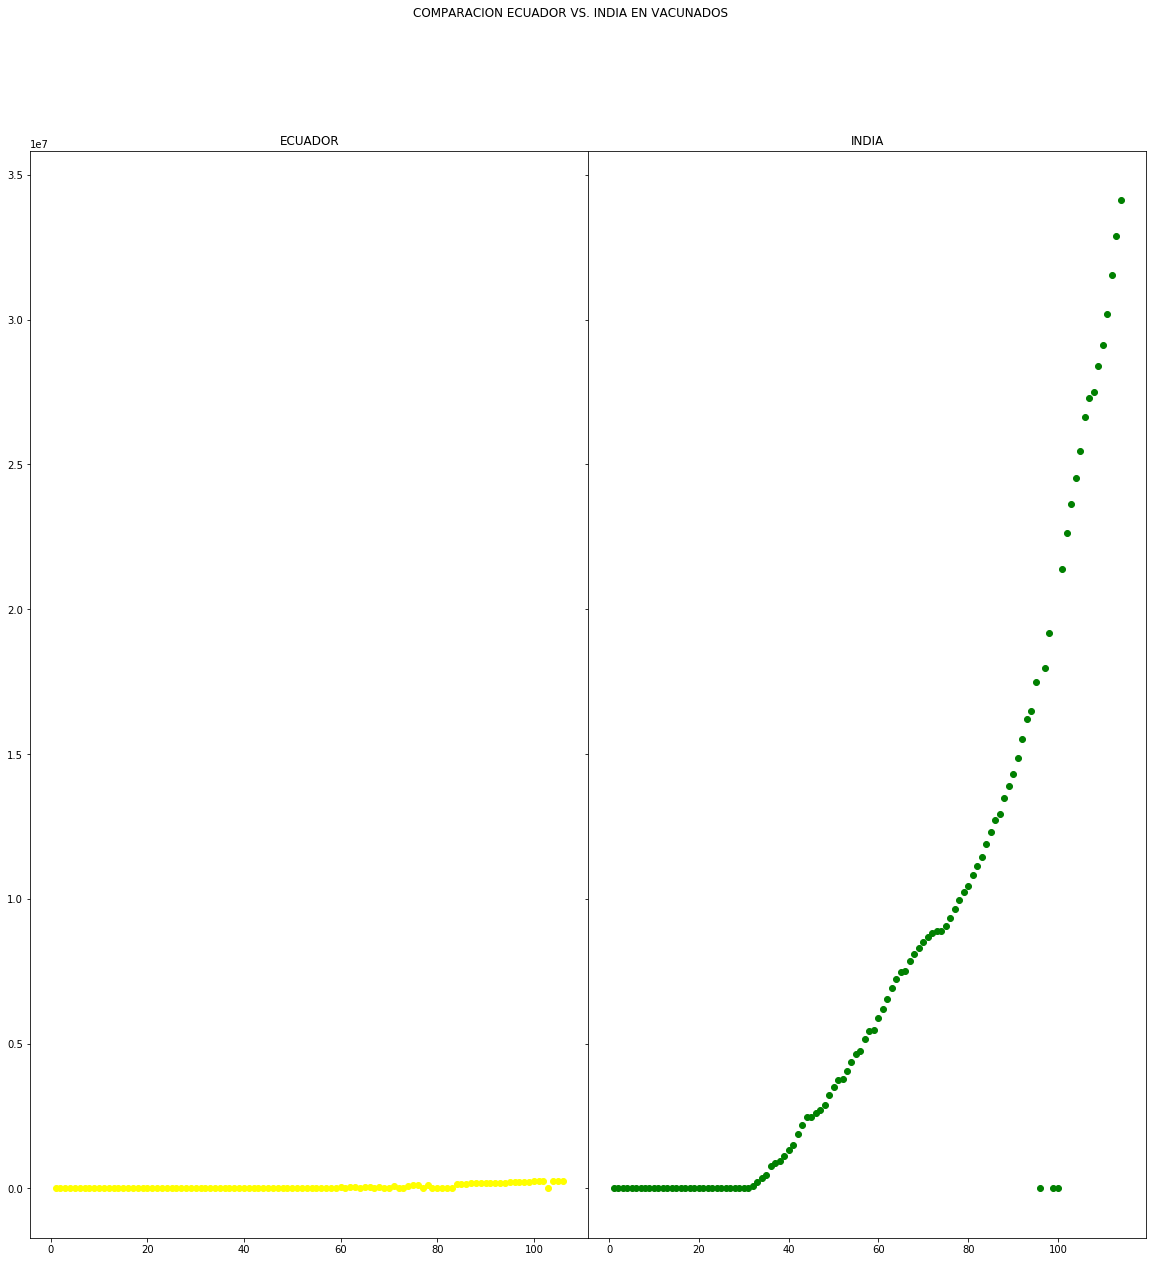

In [210]:
url_v = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
df_vacum = pd.read_csv(url_v, header = None).fillna(0)
df_vacum.columns = ['location', 'iso_code', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million']
lista_fechas = []
lista_tot = []
lista_fechasbr = []
lista_totbr = []
for i, j, k in zip(df_vacum['location'], df_vacum['date'], df_vacum['people_fully_vaccinated']):
#   print(i)
  if i == 'Ecuador':
    lista_fechas.append(j)
    lista_tot.append(k)
  elif i == 'India':
    lista_fechasbr.append(j)
    lista_totbr.append(k)
dat = np.array(lista_fechas) 
tot = np.array(lista_tot, dtype='float')
x = np.arange(1, len(tot) + 1, 1) 
dat_br = np.array(lista_fechasbr) 
tot_br = np.array(lista_totbr, dtype='float')
xbr = np.arange(1, len(tot_br) + 1, 1) 
from sklearn import linear_model 
print("-----------------ECUADOR--------------") 
regr = linear_model.LinearRegression()  
regr.fit(np.array(x).reshape(-1, 1), tot)
print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
print("----------------INDIA---------------") 
regrbr = linear_model.LinearRegression()
regrbr.fit(np.array(xbr).reshape(-1, 1), tot_br)
print('Coefficients: \n', regrbr.coef_)
print('Independent term: \n', regrbr.intercept_)
#SE GRAFICA
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(20,20))
fig.suptitle('COMPARACION ECUADOR VS. INDIA EN VACUNADOS')
ax1.scatter(x, tot, color='yellow')
ax1.set_title('ECUADOR')
x_real = np.array(range(50, 100))
ax2.scatter(xbr, tot_br, color='green')
ax2.set_title('INDIA')

<h2>Identificar cual es la fecha tentativa en la que todos los Ecuatorianos podrán ser vacunados con las dos dosis</h2>

<h2>Cual tiene una mejor predicción.</h2>
<h3>Ventajas: Aplicar una lectura de manera grafica y prediciendo datos que se obtiene para poder clasificar bien los datos.</h3>
<h3>Desventajas de los modelos: Usar los datos para poder aplicar un buen sistema de simulacion, es complicado si no se tiene los datos necesarios y la logica de estudio.

Conclusiones: Es bueno poder aplicar prediciones con datos en los cuales importe mucho ya que es horientado a la salud.
Recomendaciones:Realizar mas ejemplos como sistemas donde se aplice la lectura de datos reales</h3>


